<a href="https://colab.research.google.com/github/UdayKhunt/Machine-Learning-Projects/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_data = pd.read_csv('/content/winequality-red.csv')

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

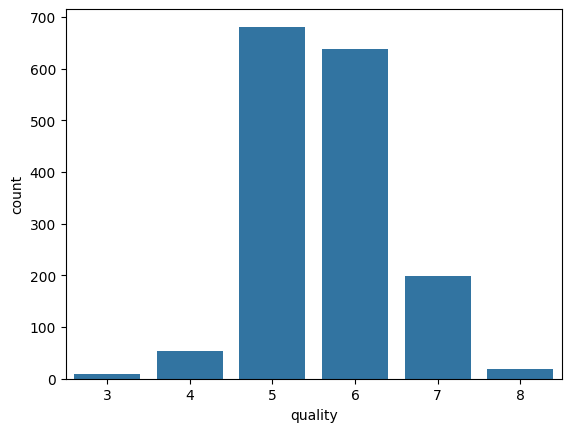

In [5]:
sns.countplot(x='quality',data=wine_data)

<Axes: xlabel='quality', ylabel='volatile acidity'>

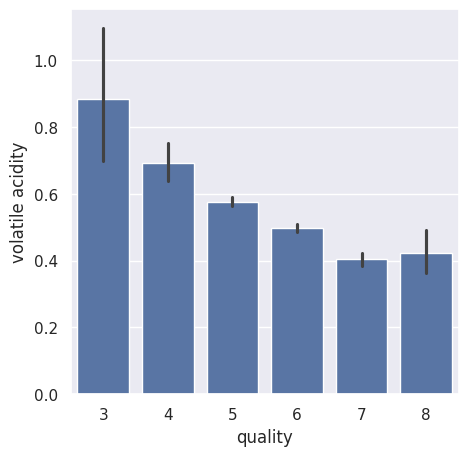

In [6]:
plt.figure(figsize=(5,5))
sns.set()
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

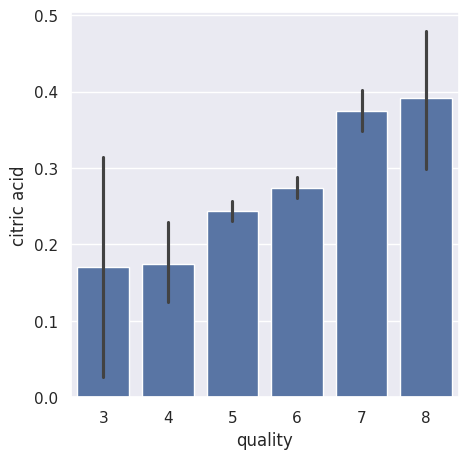

In [7]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_data)

<Axes: >

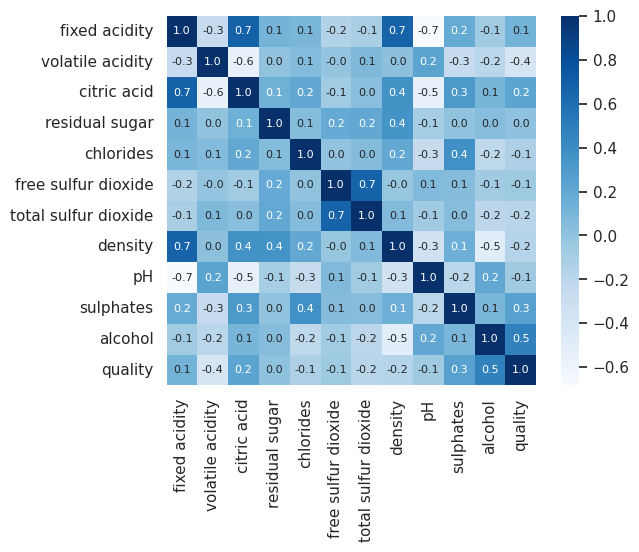

In [8]:
correlation = wine_data.corr()
sns.heatmap(correlation, cbar=True,square=True,cmap='Blues',fmt='.1f',annot=True,annot_kws={'size':8})

In [9]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
wine_data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [11]:
X=wine_data.drop(columns='quality',axis=1)


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [14]:
Y=wine_data['quality'].apply(lambda y : 1 if y>= 7 else 0)

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2,test_size=.2)

In [16]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [17]:
training_data_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(training_data_prediction,Y_train)
print(training_data_accuracy)

1.0


In [18]:
testing_data_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(testing_data_prediction,Y_test)
print(testing_data_accuracy)

0.91875


In [19]:
input_data=(4.7,0.6,0.17,2.3,0.057999999999999996,17.0,106.0,0.9932,3.85,0.6,12.9)
input_data = np.asarray(input_data)
input_data = input_data.reshape((1,-1))
input_data=scaler.transform(input_data)
prediction = model.predict(input_data)
if prediction[0] == 0:
  print('The Quality Of Wine is Bad')
else:
  print('The Quality Of Wine is Good')

The Quality Of Wine is Bad


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
